# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [105]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,1
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,1
15,13.63,1.81,2.70,17.2,112,2.85,2.91,0.30,1.46,7.30,1.28,2.88,1310,0
53,13.77,1.90,2.68,17.1,115,3.00,2.79,0.39,1.68,6.30,1.13,2.93,1375,0
39,14.22,3.99,2.51,13.2,128,3.00,3.04,0.20,2.08,5.10,0.89,3.53,760,0
141,13.36,2.56,2.35,20.0,89,1.40,0.50,0.37,0.64,5.60,0.70,2.47,780,2
28,13.87,1.90,2.80,19.4,107,2.95,2.97,0.37,1.76,4.50,1.25,3.40,915,0
106,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510,1
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0


Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [106]:
data.shape

(178, 14)

In [107]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [108]:
# Your code to evaluate data, and train and evaluate a classification model
features = list(data.columns[:-1])
label = data.columns[-1]

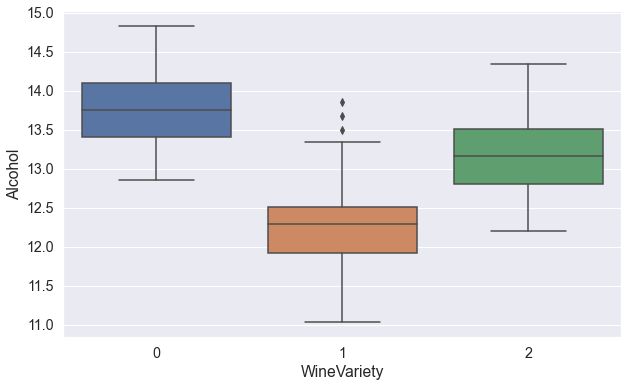

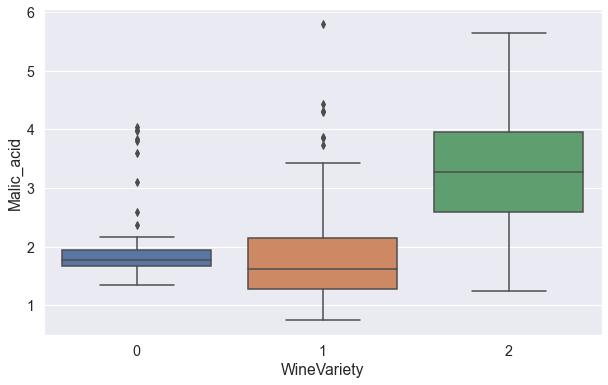

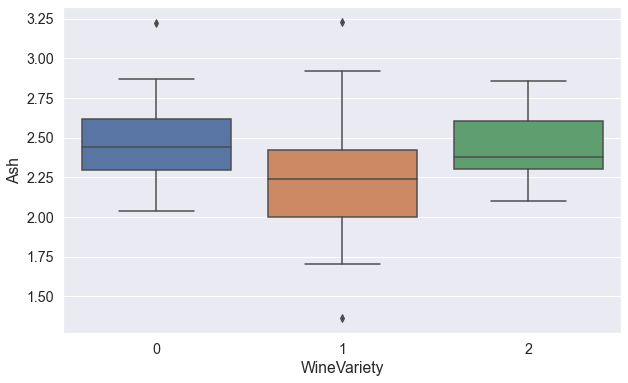

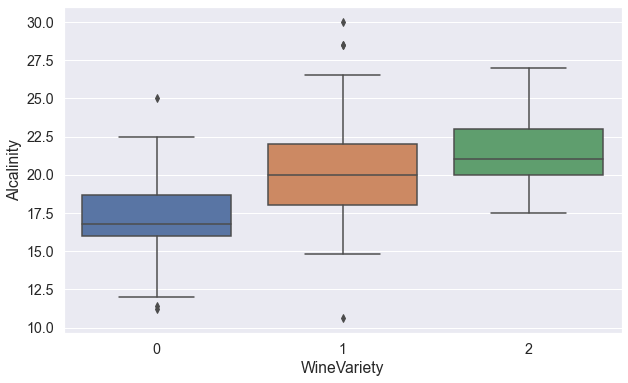

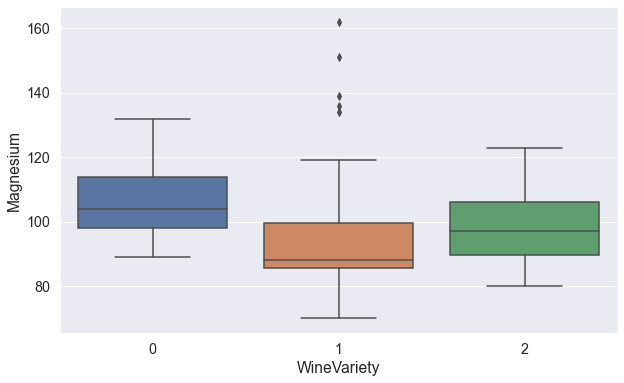

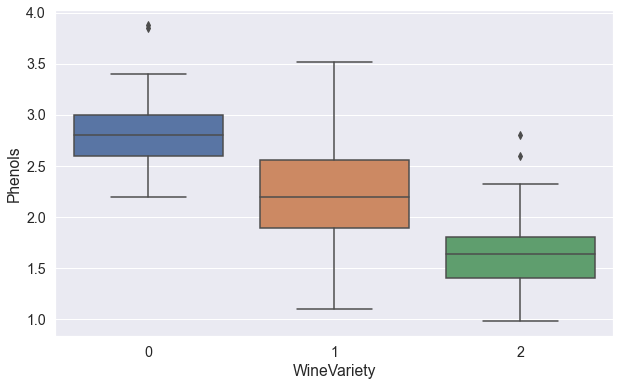

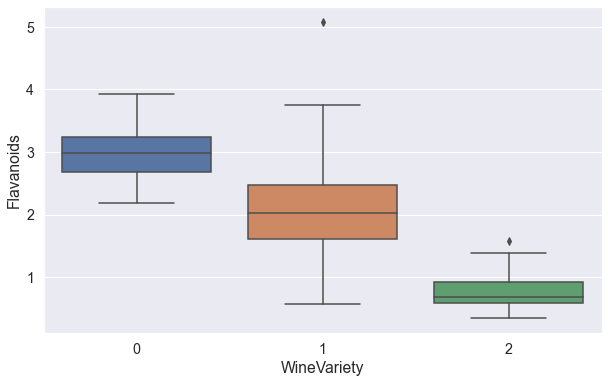

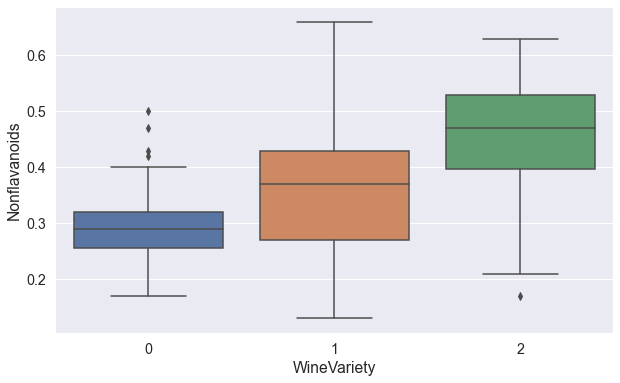

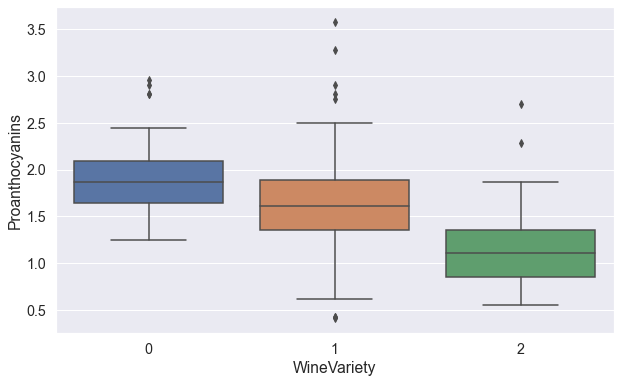

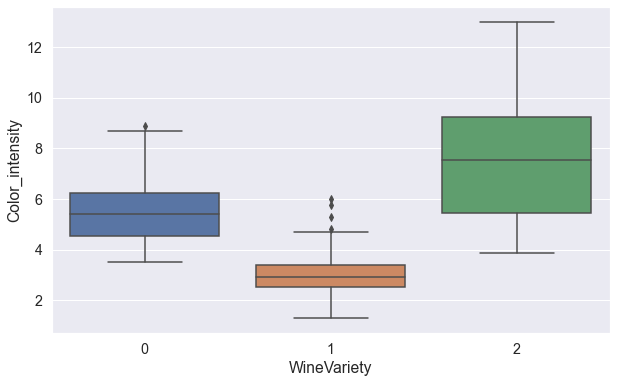

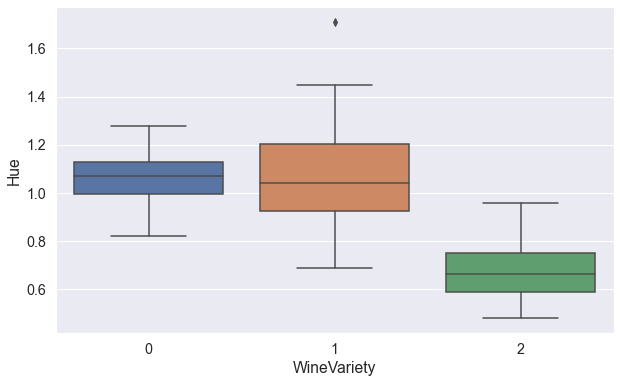

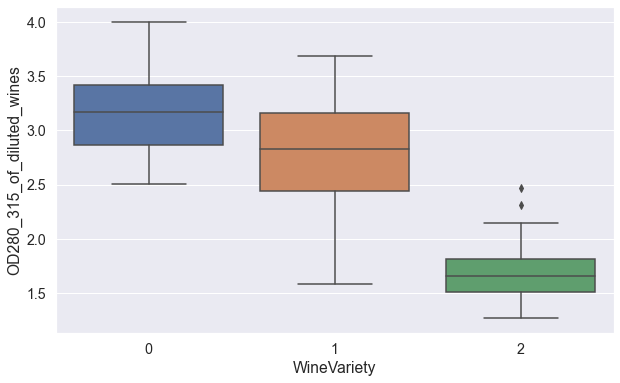

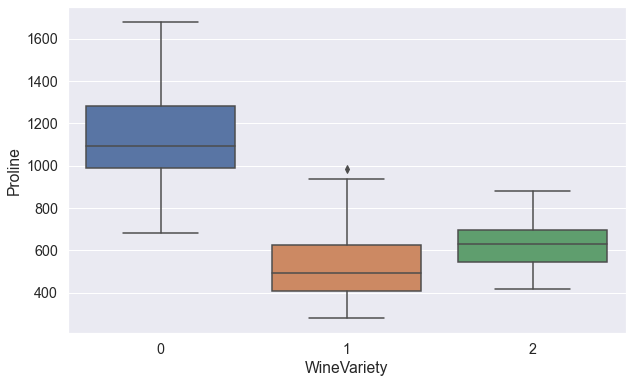

In [109]:
from scripts import plots
for feature in features:
    plots.show_box(data[[feature, label]])

In [110]:
from sklearn.model_selection import train_test_split

label_names = ['Variety A', 'Variety B', 'Variety C']

X, y = data[features].values, data[label].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

feature_columns = [0,1,2,3,4,5,6]
feature_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('preprocess', feature_transformer, feature_columns)
])

def pipeline_model(algorythm):
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', algorythm)
    ])

    return pipeline.fit(X_train, y_train)

## Logistic Regression

In [112]:
from sklearn.metrics import classification_report

model = pipeline_model(LogisticRegression(solver='lbfgs', multi_class='auto'))


predictions = model.predict(X_test)
print(f"Predicted labels:\t{predictions[:15]}\nActual labels\t:\t{y_test[:15]}")

Predicted labels:	[0 2 1 0 1 1 0 1 1 1 2 2 0 1 2]
Actual labels	:	[0 2 1 0 1 1 0 2 1 1 2 2 0 1 2]


In [113]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score

def statistics():
    print(classification_report(y_test, predictions))
    print(f"Overall accuracy:\t{accuracy_score(y_test, predictions):.3f}\nOverall recall:\t\t{recall_score(y_test, predictions, average='macro'):.3f}\nOverall precision:\t{precision_score(y_test, predictions, average='macro'):.2f}")

statistics()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.96      1.00      0.98        22
           2       1.00      0.92      0.96        13

    accuracy                           0.98        54
   macro avg       0.99      0.97      0.98        54
weighted avg       0.98      0.98      0.98        54

Overall accuracy:	0.981
Overall recall:		0.974
Overall precision:	0.99


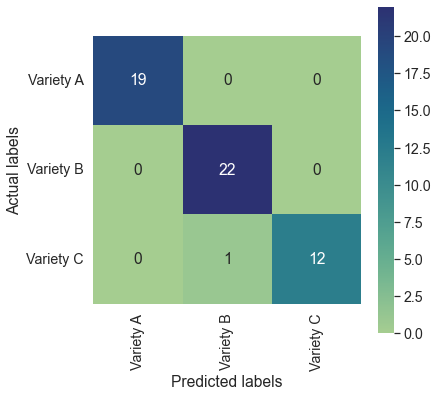

In [114]:
def plot_confusion_matrix():

    plots.show_confusion_matrix(y_test, predictions, label_names)

plot_confusion_matrix()

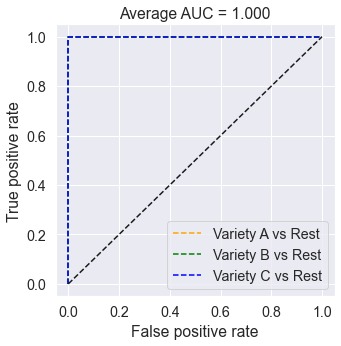

In [115]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_curve():
    prob = model.predict_proba(X_test)

    fpr = {}
    tpr = {}
    thresh = {}
    for i in range(len(label_names)):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob[:,i], pos_label=i)

    fig = plt.figure(figsize=(5,5))
    colors = ['orange', 'green', 'blue']
    for i in range(len(label_names)):
        plt.plot(fpr[i], tpr[i], linestyle='--', color=colors[i], label=label_names[i] + ' vs Rest')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')
    plt.legend(loc='best')
    plt.title(f"Average AUC = {roc_auc_score(y_test, prob, multi_class='ovr'):.3f}")

plot_roc_curve()

## Support Vector Machine

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        13

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

Overall accuracy:	1.000
Overall recall:		1.000
Overall precision:	1.00


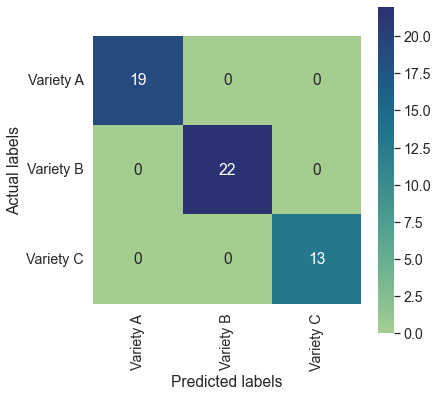

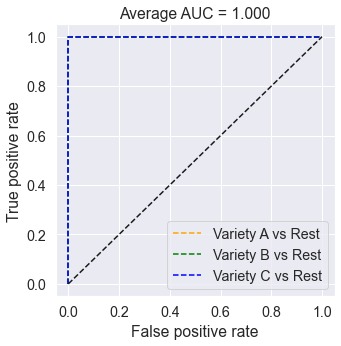

In [116]:
model = pipeline_model(SVC(probability=True))

predictions = model.predict(X_test)

statistics()
plot_confusion_matrix()
plot_roc_curve()

## Linear SVC

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.96      1.00      0.98        22
           2       1.00      1.00      1.00        13

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Overall accuracy:	0.981
Overall recall:		0.982
Overall precision:	0.99


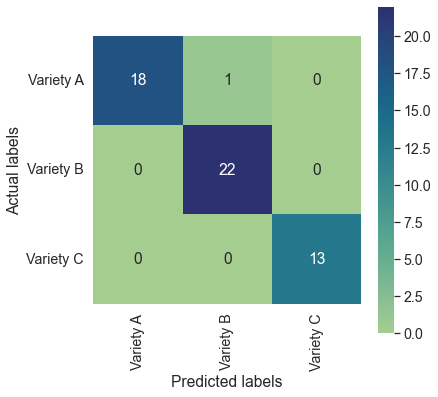

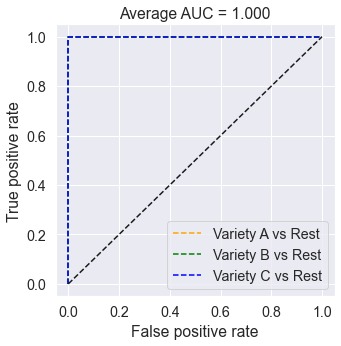

In [117]:
from sklearn.calibration import CalibratedClassifierCV

model = pipeline_model(CalibratedClassifierCV(LinearSVC()))

predictions = model.predict(X_test)

statistics()
plot_confusion_matrix()
plot_roc_curve()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.91      1.00      0.95        21
           2       1.00      0.93      0.97        15

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

Overall accuracy:	0.963
Overall recall:		0.959
Overall precision:	0.97


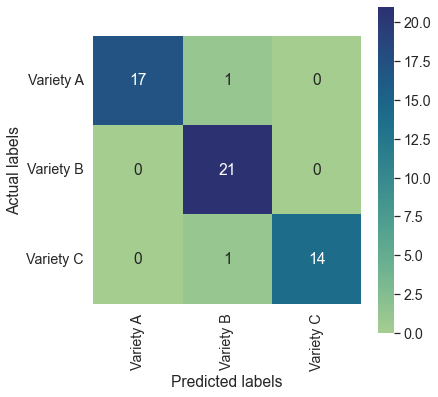

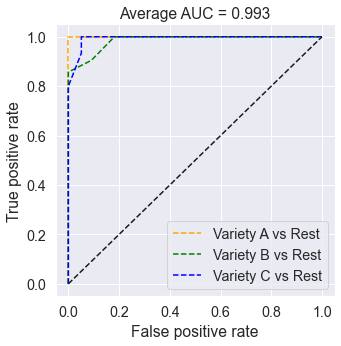

In [82]:
model = pipeline_model(KNeighborsClassifier())

statistics()
plot_confusion_matrix()
plot_roc_curve()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.95      0.90      0.93        21
           2       0.88      1.00      0.94        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54

Overall accuracy:	0.944
Overall recall:		0.950
Overall precision:	0.94


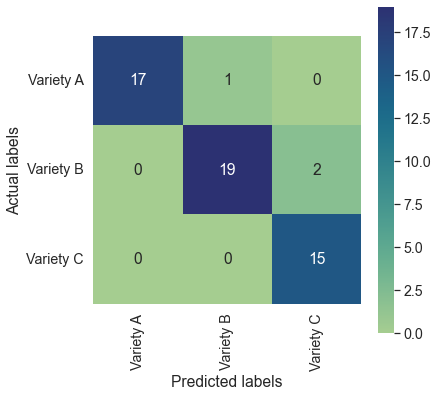

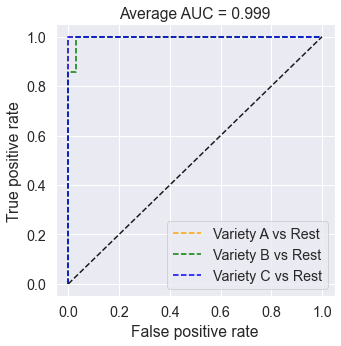

In [84]:
model = pipeline_model(RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0))
predictions = model.predict(X_test)

statistics()
plot_confusion_matrix()
plot_roc_curve()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [118]:
# Your code to predict classes for the two new samples

import joblib
import os

directory = 'models'
try:
    os.mkdir(directory)
except FileExistsError as err:
    print(err)
    pass

file_name = 'wine.pkl'

path = os.path.join(directory, file_name)

joblib.dump(model, path)

[WinError 183] Cannot create a file when that file already exists: 'models'


['models\\wine.pkl']

In [119]:
loaded_model = joblib.load(path)
import numpy as np

X_new = np.array([
    [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
    [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]
    ]).astype('float64')

result = loaded_model.predict(X_new)

print('Predictions:')
for prediction in result:
    print(f"{prediction} - {label_names[prediction]}")

Predictions:
0 - Variety A
1 - Variety B
